<a href="https://colab.research.google.com/github/berthine/IndabaX_drc_2024/blob/main/IndabaX_RDC_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DL IndabaX DR Congo 2024**
## Theme: Intelligence Artificielle pour l'exploitation minière durable; Innovation et Impact Environnemental

# **IndabaX 2024: Tutorial Session**
Vendredi, 13/ Septembre/2014

Elaborated by Berthine Nyunga Mpinda

Research Fellow at Tubingen University, Germany

## **Prédiction de la qualité dans un processus minier**: Explorez des données industrielles réelles et aidez les usines de production à être plus efficaces.

### **1. Introduction**

Dans l'industrie minière, une grande quantité de données est générée et collectée chaque jour. Dans ce tutorial, nous allons examiner un jeu de données concernant un processus de flottation minérale dans une usine de concentration. L' analyse des données et le Machine Learning sont d'excellents outils pour exploiter les données collectées dans le secteur minier, permettant d'analyser, de visualiser et de faire des prédictions. Ce tutoriel a pour objectif de mieux comprendre les données et de prendre des décisions éclairées en utilisant des modèles de Machine Learning, notamment les modèles de régression et de Random Forest (forêt aléatoire).

### À propos de données

Ces données sont de production réelles qui proviennent d'une des parties les plus importantes d'un processus minier : une usine de flottation et sont disponible sur le site [Kaggle](https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process/data#).

### Objectif général:

- L'objectif principal est de prédire **la quantité d'impuretés dans le concentré de minerai (silica concentrate)**.
- Comme cette impureté est mesurée toutes les heures, la prédiction de la quantité de silice (impureté) dans le concentré permettrait :
  - D'aider les ingénieurs en leur fournissant des informations précoces pour prendre des décisions.
  - De leur permettre d'agir plus rapidement et de manière proactive.
  - De contribuer à la protection de l'environnement en réduisant la quantité de minerai envoyée dans les résidus en diminuant la silice dans le concentré de minerai.

  












### **2. Exploration des données**

Commencons par importer les bibliothèques (library) necéssaire ainsi que les données.


In [ ]:
#Si les données sont stockées dans le google drive
from google.colab import drive # importer la bibliotheque drive
drive.mount('/content/drive') ## monter le Google Drive au chemin spécifié


Mounted at /content/drive


In [ ]:
#Charger les bibliothèques requises
import pandas as pd # traitement des données, entrée/sortie de fichiers CSV (par ex. pd.read_csv)
import numpy as np # algèbre linéaire
import matplotlib.pyplot as plt # visualisation des données
import seaborn as sns # visualisation des données

In [ ]:
# importer et lire le fichier des données en utilisant la bibliothere pandas
mining_process_df = pd.read_csv('/content/drive/MyDrive/Indaba2023/MiningProcess_Flotation_Plant_Database.csv',decimal=",")

In [67]:
#Lire les données à partir du lien
url =  'https://drive.google.com/uc?id=14JjjkYpYm-ekwUa6RKKM0BioIAWfCtNO'
mining_process_df = pd.read_csv(url)

In [ ]:
# Lire les 5 premieres lignes du tableau
mining_process_df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [ ]:
# Affichez les noms des colonnes en tapant la commande
mining_process_df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

### Contenu

  * La première colonne montre l'intervalle de temps et de date (de mars 2017 à septembre 2017). Certaines colonnes ont été échantillonnées toutes les 20 secondes, tandis que d'autres l'ont été toutes les heures.
  * Les deuxième et troisième colonnes sont des mesures de qualité de la pulpe de minerai de fer juste avant qu'elle ne soit introduite dans l'usine de flottation.
  * Les colonnes 4 à 8 représentent les variables les plus importantes qui influencent la qualité du minerai à la fin du processus.
  * Des colonnes 9 à 22, nous pouvons observer les données du processus (niveau et débit d'air à l'intérieur des colonnes de flottation), qui influencent également la qualité du minerai.
  
* Les deux dernières colonnes sont les mesures finales de la qualité de la pulpe de minerai de fer provenant du laboratoire.

**L'objectif est de prédire la dernière colonne, qui correspond au pourcentage de silice dans le concentré de minerai de fer.**
En d'autre terme:

**L'objectif est de prédire le pourcentage de silice à la fin du processus, qui correspond au concentré de minerai de fer et à son impureté (c'est-à-dire le pourcentage de silice).**

In [ ]:
#Afficher la taille (dimension) des données
mining_process_df.shape

(737453, 24)

Comme nous pouvons le voir, le tableau des données a 24 colonnes et 737 453 lignes. Pour raison de temps d'execution et de memoir, tu peux continuer l' analysis avec une partie des données.

In [ ]:
#Information Genera sur les données

mining_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [ ]:
#Verifions si notre tableau a des données manquantes

mining_process_df.isnull().sum()

,0
date,0
% Iron Feed,0
% Silica Feed,0
Starch Flow,0
Amina Flow,0
Ore Pulp Flow,0
Ore Pulp pH,0
Ore Pulp Density,0
Flotation Column 01 Air Flow,0
Flotation Column 02 Air Flow,0


Comme nouspouvons le voir, il n'y a pas des données maquantes.

Avec la méthode `.info()`, nous constatons que la colonne date est de type objet, alors qu'elle devrait être de type datetime.

In [ ]:
mining_process_df['date'] = pd.to_datetime(mining_process_df['date'])

In [ ]:
## Confirmer si la colonne date a été changé
mining_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [ ]:
# Analyse Statistique: La commande .describe() permet d'afficher une statistique descriptive telque la moyenne, le maximum, minimum, etc sur les données
mining_process_df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,2017-06-16 03:27:22.656549376,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
min,2017-03-10 01:00:00,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,2017-05-04 23:00:00,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,2017-06-16 15:00:00,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,2017-07-29 07:00:00,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,2017-09-09 23:00:00,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000
std,NaN,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554


Notons que la méthode `.describe()` ne fonctionne que sur les colonnes numériques. C'est un moyen rapide de trouver la moyenne, la médiane, le minimum, le maximum, et d'autres statistiques pour chaque colonne numérique.

Nous pouvons aussi selectionner quelques colonnes pour une analyse profonde.

In [ ]:
important_cols = [
    'date',
    '% Iron Concentrate',
    '% Silica Concentrate',
    'Ore Pulp pH',
    'Flotation Column 05 Level'
]
mining_important_df = mining_process_df[important_cols]
mining_important_df.head()

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
0,2017-03-10 01:00:00,66.91,1.31,10.0664,502.255
1,2017-03-10 01:00:00,66.91,1.31,10.0672,496.363
2,2017-03-10 01:00:00,66.91,1.31,10.0680,484.411
3,2017-03-10 01:00:00,66.91,1.31,10.0689,471.411
4,2017-03-10 01:00:00,66.91,1.31,10.0697,462.598


In [ ]:
mining_important_df.describe()

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
count,737453,737453.000000,737453.000000,737453.000000,737453.000000
mean,2017-06-16 03:27:22.656549376,65.050068,2.326763,9.767639,425.251706
min,2017-03-10 01:00:00,62.050000,0.600000,8.753340,166.991000
25%,2017-05-04 23:00:00,64.370000,1.440000,9.527360,357.653000
50%,2017-06-16 15:00:00,65.210000,2.000000,9.798100,408.773000
75%,2017-07-29 07:00:00,65.860000,3.010000,10.038000,484.329000
max,2017-09-09 23:00:00,68.010000,5.530000,10.808100,675.644000
std,NaN,1.118645,1.125554,0.387007,84.535822


## Correlation entre les variables

La corrélation mesure la relation entre deux variables, indiquant si et dans quelle mesure l'une évolue avec l'autre. Elle est essentielle pour identifier les variables importantes dans un modèle prédictif, détecter la multicolinéarité (variables fortement liées), et simplifier les modèles en réduisant la dimensionnalité.

<Axes: >

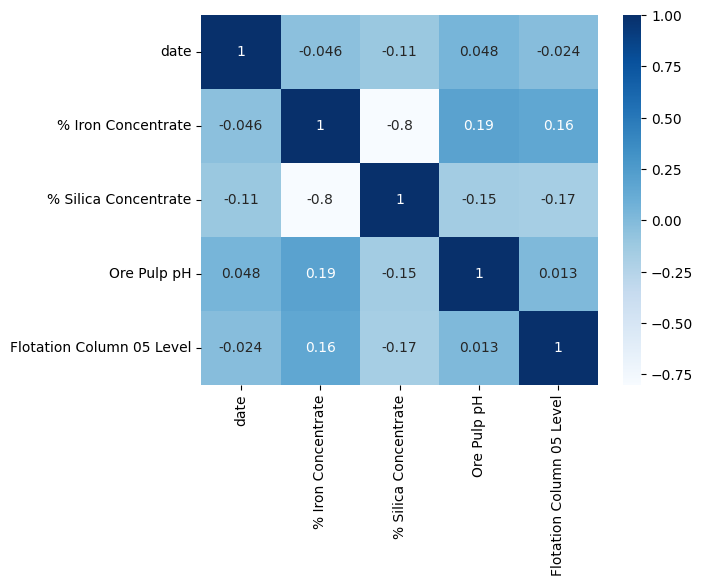

In [ ]:
#Afficher la table de correlation entre les variables du tableau mining_important que nous avont extrait
corr_mining_df = mining_important_df.corr()
sns.heatmap(corr_mining_df, cmap="Blues", annot=True)

En regardant le tableau, il ya une forte correlation negative (-0.8) entre la variable %silic concentrtion et %iron concentrate. Aussi une correlation positive de 0.19 entre  %iron concentrate et Ore pulp pH.

Affichions la correlation entre toutes les variables:

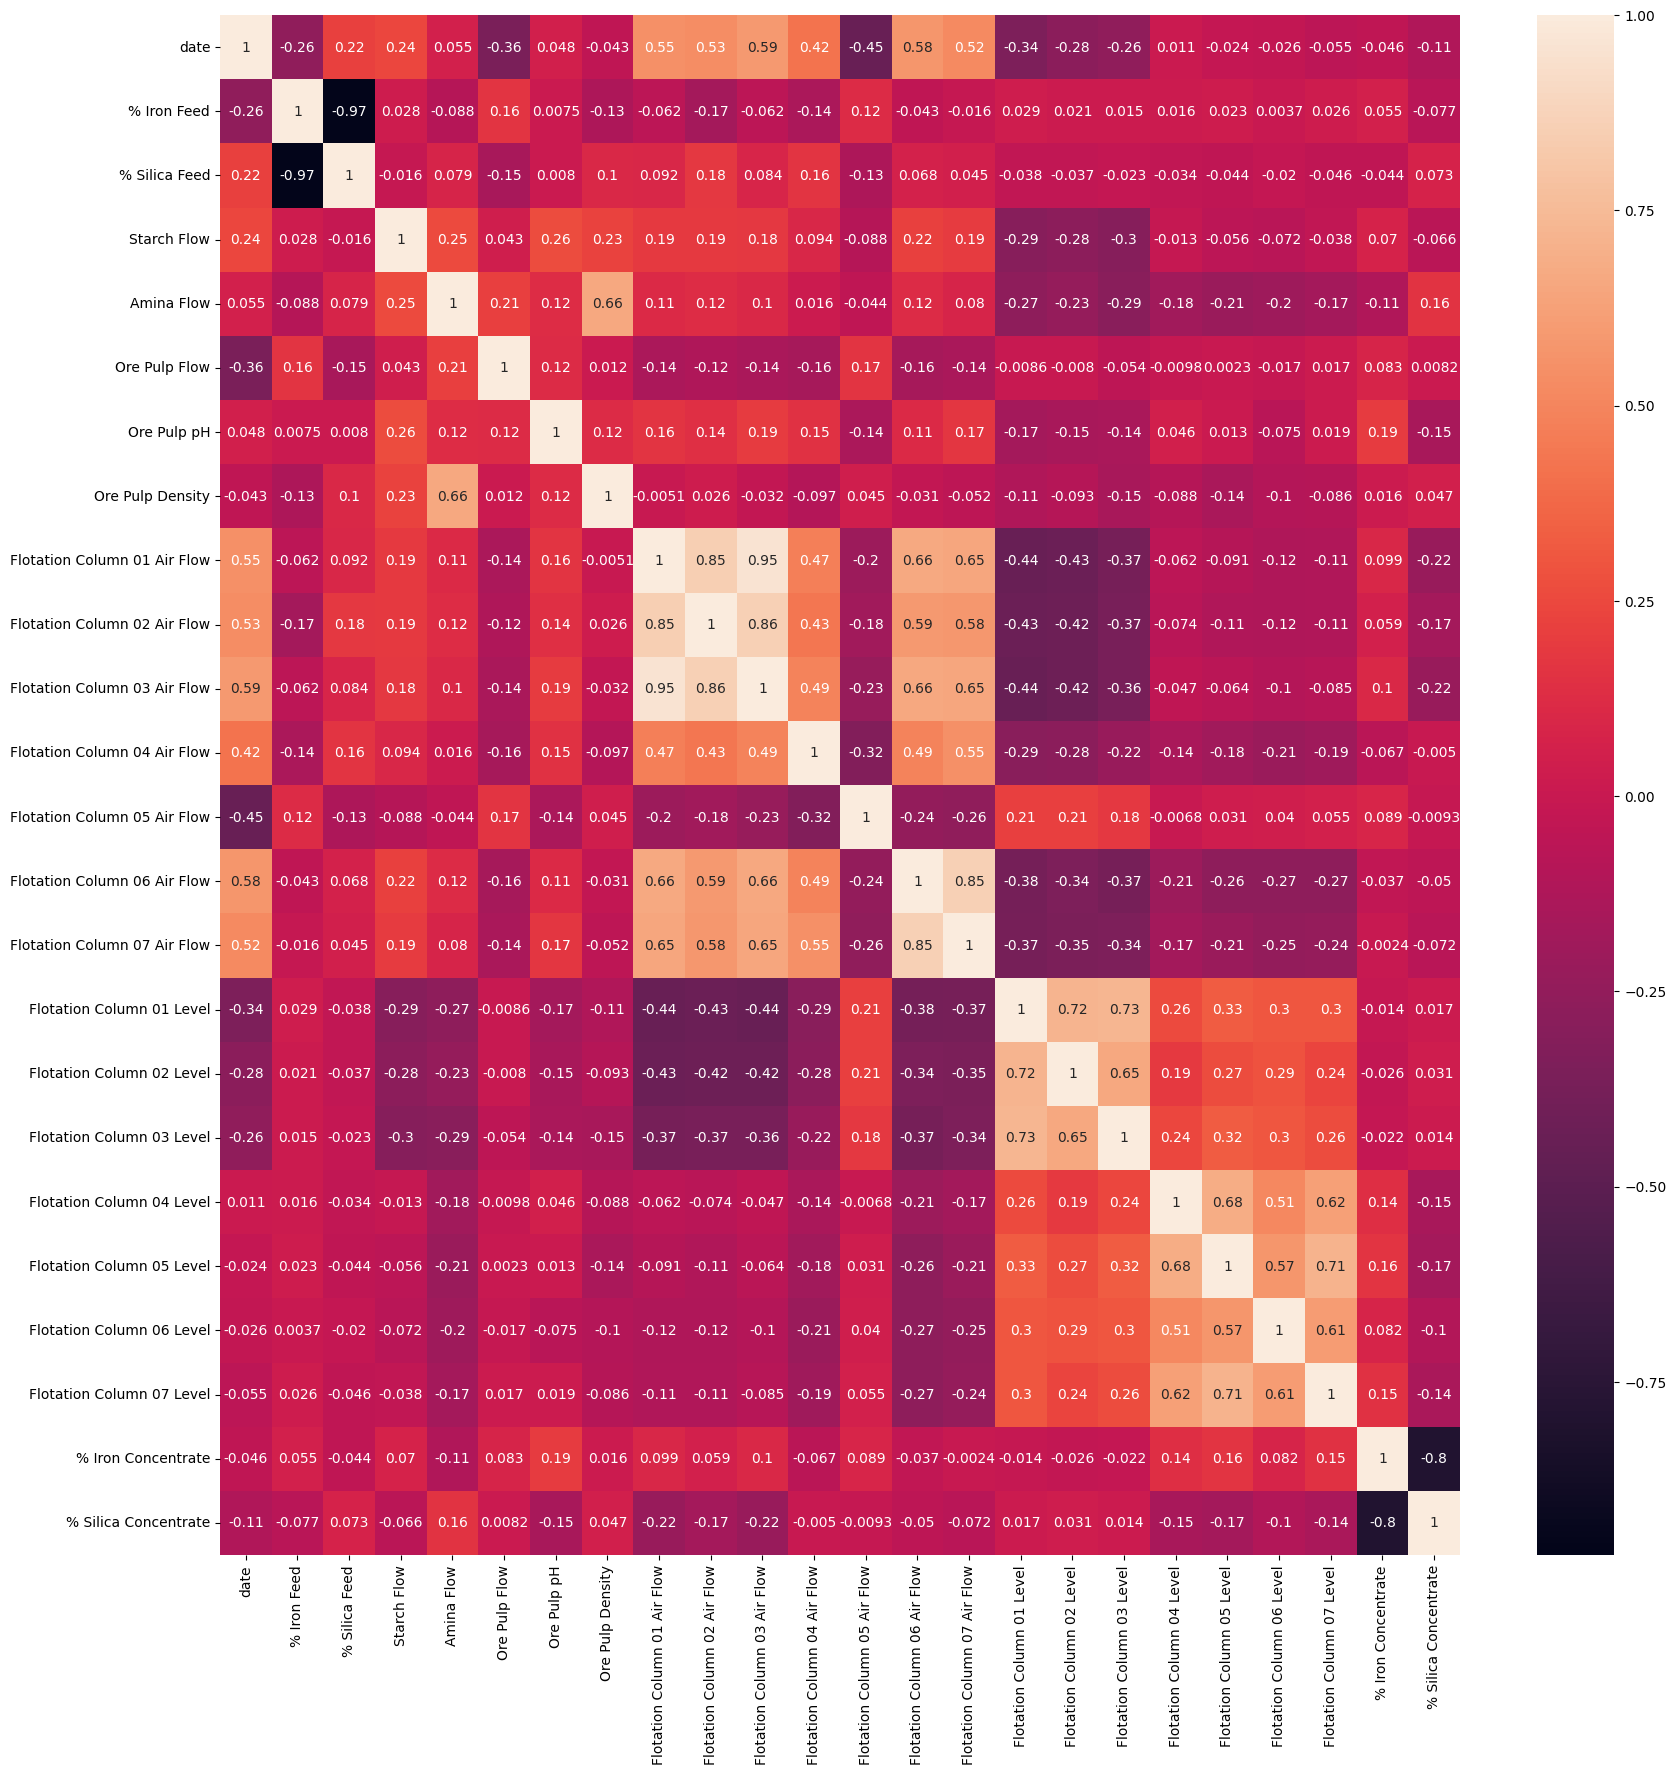

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(mining_process_df.corr(), annot=True)
plt.show()

À partir de la matrice de corrélation, les variables possibles en relation avec le target sont les suivantes :

* iron concentrate
* amina flow
* ore pulp flow
* ore pulp density
* flotation air flow (01|02|03)
* flotation column level (04|05|06|07)

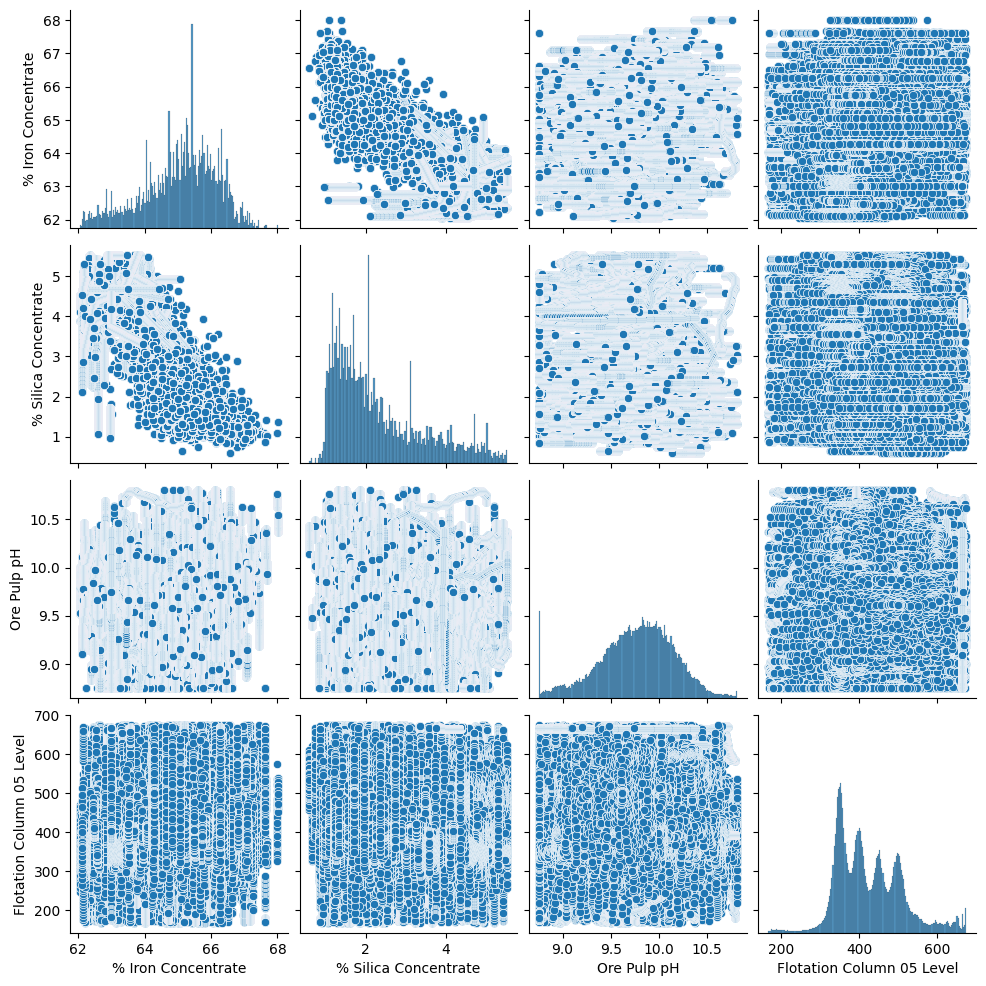

In [ ]:
#Affichions la distribution de quelques variables
sns.pairplot(mining_important_df)

<Axes: xlabel='date', ylabel='% Iron Concentrate'>

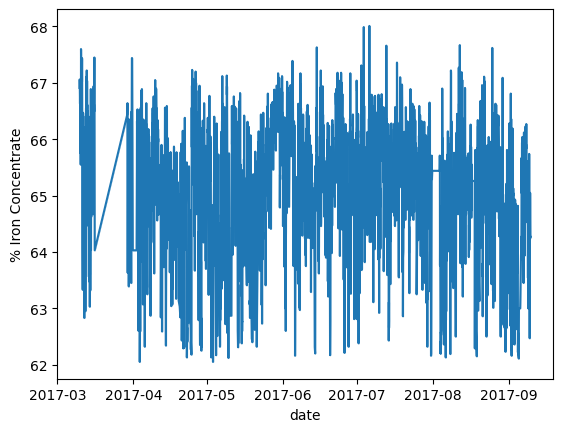

In [ ]:
#On peut voir l'evolution de % de concentration d'iron par papport au temps
sns.lineplot(x='date', y='% Iron Concentrate', data=mining_process_df)

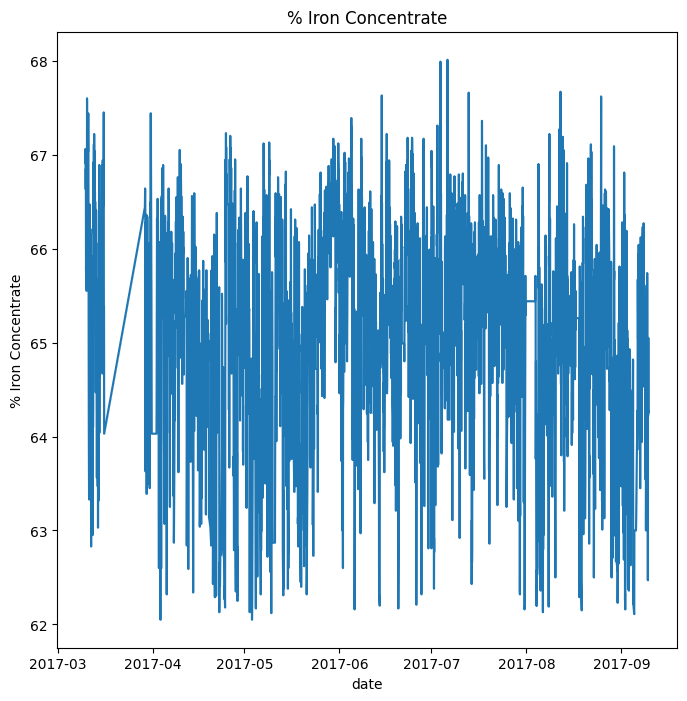

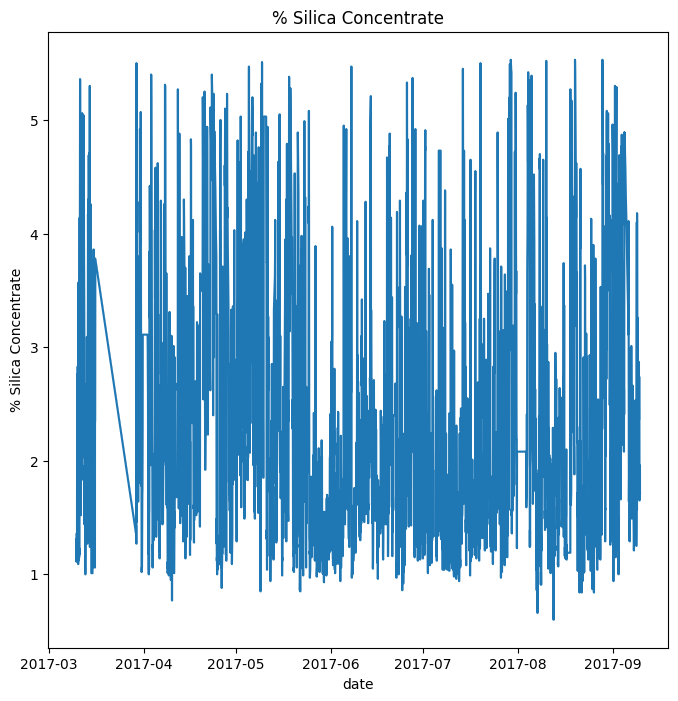

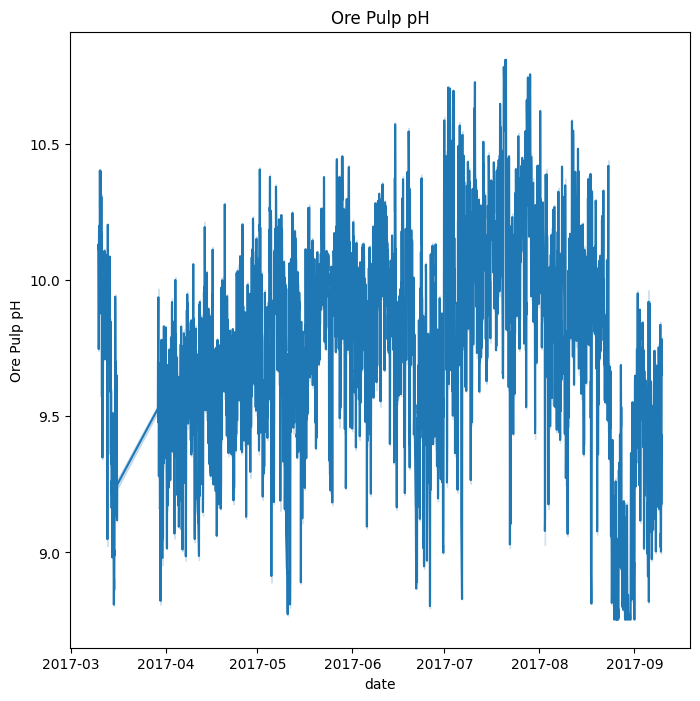

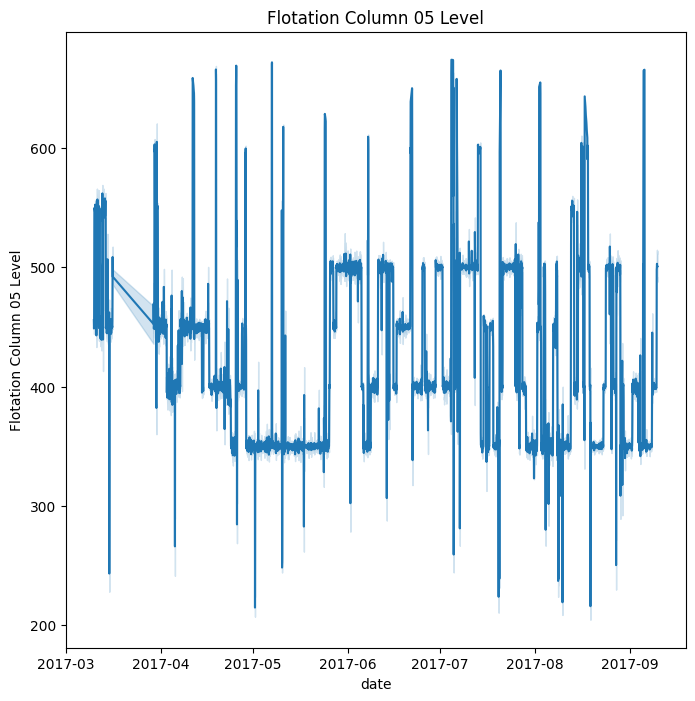

In [ ]:
#Une gereralisation pour quelques colonnes
for i in important_cols[1:5]:
    plt.figure(figsize=(8,8))
    sns.lineplot(x="date", y = i, data = mining_important_df)
    plt.title(i)
    plt.show()


Nous n'avons pas besoin de la colonne de date car la date n'est pas liée au résultat du minerai. Supprimons le champ de date.

In [ ]:
mining_process_df.drop(['date'],axis=1,inplace=True)

### Preparation des données pour l'entrainement des modeles.

In [ ]:
from PIL import Image #pour afficher les images
import matplotlib.pyplot as plt

(-0.5, 809.5, 280.5, -0.5)

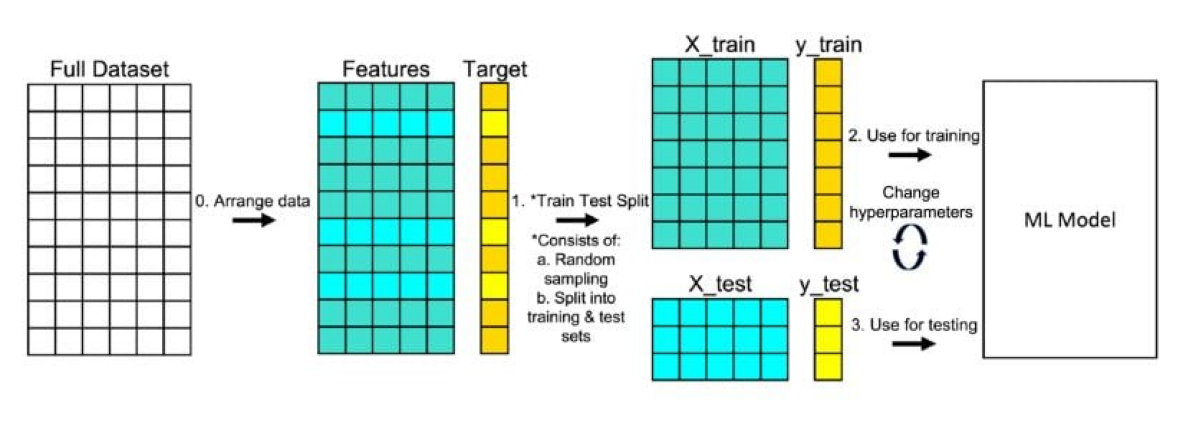

In [ ]:
img_path = '/content/drive/MyDrive/Indaba2023/4_train-test-split.jpg' #Lien vers l'image. Remplace ce lien avec le chemin où se tes emages sont stochées.
img = Image.open(img_path) # ouvrir l'image
plt.figure(figsize=(15, 10)) # Definir la dimension de l'image
plt.imshow(img) # Afficher image
plt.axis('off') # Pour ne pas afficher les axes plt.show()

Division du jeu de données en ensemble d'entraînement (train) et ensemble de test (test)

Le jeu de données fourni n'a pas d'ensembles de test et d'entraînement prédéfinis. Nous allons commencer par diviser le jeu de données fourni en 2 parties: les attributs (features) et le taget. L'image ci-haut explique comment les données sont divisées. La partie *Train* nous servira à entrainer le model et la partie *test* nous servira de tester les predictions du model par rapport aux données réelles.

Pour notre cas, la variable a prédire ou à expliquer (appelée targety) est % Silica Concentrate, sera notée par y et le reste des variables appleées variables expliquées ou attributs (features) seront notées par X.


In [ ]:

y = mining_process_df['% Silica Concentrate']
X = mining_process_df.drop(['% Silica Concentrate'],axis=1)

In [ ]:
#verifier la dimension de X et y
X.shape, y.shape

((737453, 22), (737453,))

In [ ]:
from sklearn.model_selection import train_test_split #pour diviser les données
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=55,test_size=0.3)

Nous avons considerés 70% des données pour l'entraînement (training) et 30% des données pour le test (testing).

In [ ]:
#Enverifiant les dimension une fois de plus
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((516217, 22), (221236, 22), (516217,), (221236,))

In [ ]:
y_train.head()

,% Silica Concentrate
476790,1.000000
134350,5.229075
377463,2.320000
43833,2.530000
391386,2.400000


Comme nous pouvons le constater la division des données se fais de maniere aléatiore.

### Entrenaiment des modeles

Commecons par la création d'un modèle de référence: Utilisons un régresseur fictif (Dummy) pour créer un modèle de référence afin de vérifier si le machine learning peut résoudre ce problème.









(-0.5, 299.5, 167.5, -0.5)

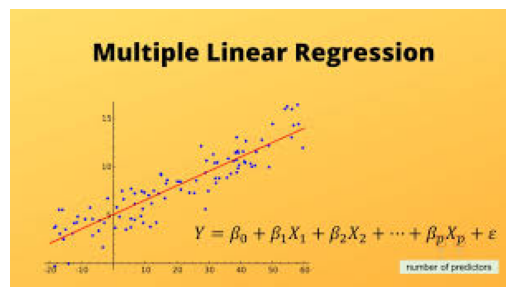

In [ ]:
img = '/content/drive/MyDrive/Indaba2023/linear_regression.jpeg'
img = Image.open(img)
plt.imshow(img)
plt.axis('off')

(-0.5, 1435.5, 707.5, -0.5)

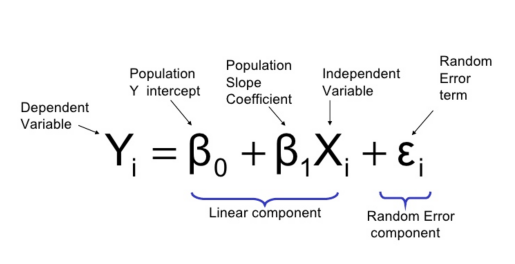

In [ ]:
img = '/content/drive/MyDrive/Indaba2023/LR_equation.png'
img = Image.open(img)
plt.imshow(img)
plt.axis('off')

In [ ]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)

DummyRegressor()

In [ ]:
y_preds=dummy_regr.predict(x_test)

Maintenant que nous avons réalisé une prédiction en utilisant le régressseur de base, évaluons sa performance en utlisant les métriques suivantes:
* **MAE**: Mean Absolute Error
* **MSE**: Mean Squared error
* **RMSE**: Root Mean Squared error
* **$R^2$**: R-squared


Correspondance en francais:

- **MAE** : Erreur Absolue Moyenne (EAM)
- **MSE** : Erreur Quadratique Moyenne (EQM)
- **RMSE** : Racine de l'Erreur Quadratique Moyenne (REQM) - - **$R^2$** : Coefficient de Détermination (Ajustement)

Notons que le terme **"métrique"** (metric) qui signifie ***mesure*** est souvent utilisé dans le contexte des statistiques et du machine learning pour désigner les critères d'évaluation d'un modèle.



(-0.5, 392.5, 453.5, -0.5)

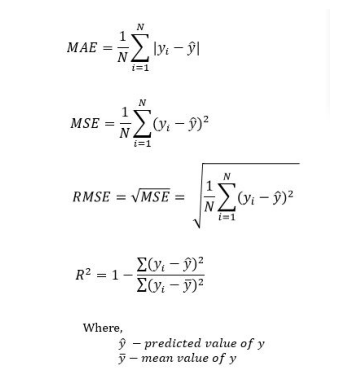

In [ ]:
img = '/content/drive/MyDrive/Indaba2023/formula-MAE-MSE-RMSE-RSquared.JPG'
img = Image.open(img)
plt.imshow(img)
plt.axis('off')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print( 'MSE: ',mean_squared_error(y_test, y_preds, squared=False))

#setting squared to false returns RMSE

MSE:  1.1251208529008483


In [ ]:
#this is just the square of the RMSE value
print('RMSE: ', mean_squared_error(y_test, y_preds, squared=True))


RMSE:  1.2658969336323325


In [ ]:
print('MAE: ', mean_absolute_error(y_test, y_preds))

MAE:  0.9162112334936041


In [ ]:
## A completer
# Importez la bibliotheque  de la métrique  R^2 et calculez sa valeur entre y_test et y_preds
#TON CODE ICI


Le modèle de référence que nous avons choisi est le régresseur de base, qui retourne les prédictions comme la moyenne de toutes les valeurs. Ce modèle de référence a réussi à obtenir une RMSE de 1,265 et une MAE de 0,9162. Nous devons construire des modèles qui performent mieux que celui-ci.

#### Model de regression lineaire

In [ ]:
from sklearn.linear_model import LinearRegression #importer la bibliotheque

In [ ]:
#Initialiser le model
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Affichier les coefficients du modèle
reg_model.coef_

array([ 2.63338389e-02,  2.93468694e-02, -1.73717810e-05,  6.81399637e-04,
        4.26274742e-03,  4.57100605e-02,  1.69982081e-01, -5.15498586e-03,
       -1.48052581e-03, -9.20873004e-04,  2.10215351e-03,  1.45369797e-02,
       -8.42003118e-05,  1.26177974e-03, -2.84158861e-04, -1.60352161e-04,
       -8.52612489e-05, -1.20243378e-04, -1.85310459e-04, -2.11281971e-04,
        1.94478638e-04, -7.87055368e-01])

Le nombres des coefficients correspond au nombres des attributs (features).

In [ ]:
#Affichions aussi l'intercept
reg_model.intercept_

46.100145426881696

In [ ]:
#On peut aussi tester comment le model a predit sur le training
train_reg_pred = reg_model.predict(x_train)

In [ ]:
print('MSE: ', mean_squared_error(y_train,train_reg_pred,squared=False))
print('RMSE: ', mean_squared_error(y_train,train_reg_pred,squared=True))
print('MAE: ',mean_absolute_error(y_train, train_reg_pred))

MSE:  0.6368067185221985
RMSE:  0.4055227967550106
MAE:  0.4919374639838685


In [ ]:

reg_pred=reg_model.predict(x_test)

reg_pred
print('MSE: ', mean_squared_error(y_test, reg_pred, squared=False))
print('RMSE: ', mean_squared_error(y_test,reg_pred,squared=True))
print('MAE: ',mean_absolute_error(y_test, reg_pred))

MSE:  0.6385001738839129
RMSE:  0.40768247204978697
MAE:  0.4931276868554133


In [ ]:
## A completer
# Importez la bibliotheque  de la métrique  R^2 et calculez sa valeur entre y_test et reg_pred
#TON CODE ICI

Ce modèle de régression linéaire simple a réussi à atteindre une RMSE de 0,4076 et un MAE de 0,4931. Il s'agit d'une amélioration considérable par rapport au modèle de base (1.2658 et 0.91, respectivemnt). On peut donc dire que ce problème peut être résolu par l'apprentissage automatique.

Notons que d'autres model de regression avec les parametres de regularisation comme Ridge regression, Lasso, peuvent être aussi utiliser. Sans citer le decision trees, XGBoost, ainsi que les reseaux des neurons (Neural Network).

### Model de Random Forest Regressor

(0.0, 1.0, 0.0, 1.0)

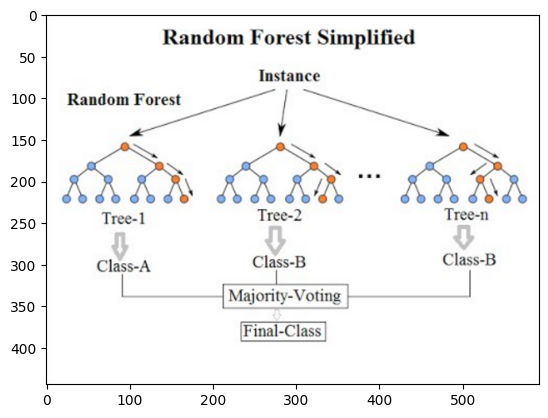

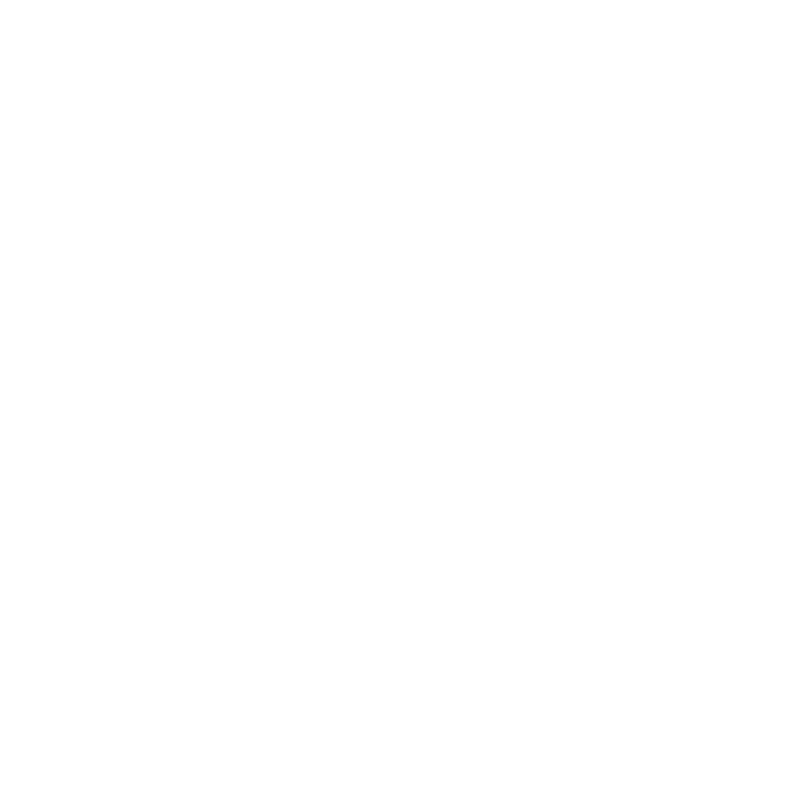

In [ ]:
img = '/content/drive/MyDrive/Indaba2023/RF_EN_IMAGE.png'
img = Image.open(img)
plt.imshow(img)
plt.figure(figsize=(10,10))
plt.axis('off')

In [ ]:
from sklearn.ensemble import RandomForestRegressor #importer la bibliotheque
randFor = RandomForestRegressor(n_estimators=10, random_state=55) #initialiser le modele

En essayant d'entraîner le modèle sur l'ensemble de l'entraînement avec `n_estimators` réglé sur 50 prend beaucoup de temps même avec un GPU. C'est ainsi que nous avons réduit la charge computationnelle en limitant `n_estimators` à 10 et en utilisant 50 % de l'ensemble d'entraînement.

In [ ]:
new_x_train, new_X_test, new_y_train, new_y_test = train_test_split( x_train, y_train, train_size=0.20, random_state=66)

In [ ]:
new_x_train.shape, new_X_test.shape, new_y_train.shape, new_y_test.shape

((103243, 22), (412974, 22), (103243,), (412974,))

In [ ]:
#Entrainer le modèle
randFor.fit(new_x_train,new_y_train)

RandomForestRegressor(n_estimators=10, random_state=55)

In [ ]:
#faire les predictions
rand1_pred=randFor.predict(x_test)
rand1_pred

array([1.19 , 2.586, 1.64 , ..., 2.2  , 4.072, 1.19 ])

In [ ]:
print('MSE: ',mean_squared_error(y_test, rand1_pred, squared = False))
print('RMSE: ',mean_squared_error(y_test, rand1_pred, squared = True))
print('MAE: ',mean_absolute_error(y_test, rand1_pred))

MSE:  0.13253595281593664
RMSE:  0.01756577878882818
MAE: 0.05782545929563273


Ce modèle de Random forest a obtenu un MSE de 0,1332 et un MAE de 0,0581. De manière évidente, le régressseur de forêt aléatoire surpasse tous les modèles précédents avec une grande marge. Cela a été accompli avec le strict minimum d'entrées.

Nous pouvons également visualiser l'importance des caractéristiques (features) en utilisant le modèle de Fandom forest (forêt aléatoire) pour voir celles ayant un impact significatif sur la prédiction.

                         Feature  Importance
21            % Iron Concentrate    0.724999
1                  % Silica Feed    0.035787
0                    % Iron Feed    0.035417
5                    Ore Pulp pH    0.025300
16     Flotation Column 03 Level    0.022054
3                     Amina Flow    0.020620
7   Flotation Column 01 Air Flow    0.020132
6               Ore Pulp Density    0.014315
10  Flotation Column 04 Air Flow    0.013141
11  Flotation Column 05 Air Flow    0.012814
14     Flotation Column 01 Level    0.011522
2                    Starch Flow    0.009249
15     Flotation Column 02 Level    0.008020
4                  Ore Pulp Flow    0.007354
18     Flotation Column 05 Level    0.006653
19     Flotation Column 06 Level    0.006024
8   Flotation Column 02 Air Flow    0.005687
17     Flotation Column 04 Level    0.005471
12  Flotation Column 06 Air Flow    0.004986
20     Flotation Column 07 Level    0.004034
9   Flotation Column 03 Air Flow    0.003525
13  Flotat

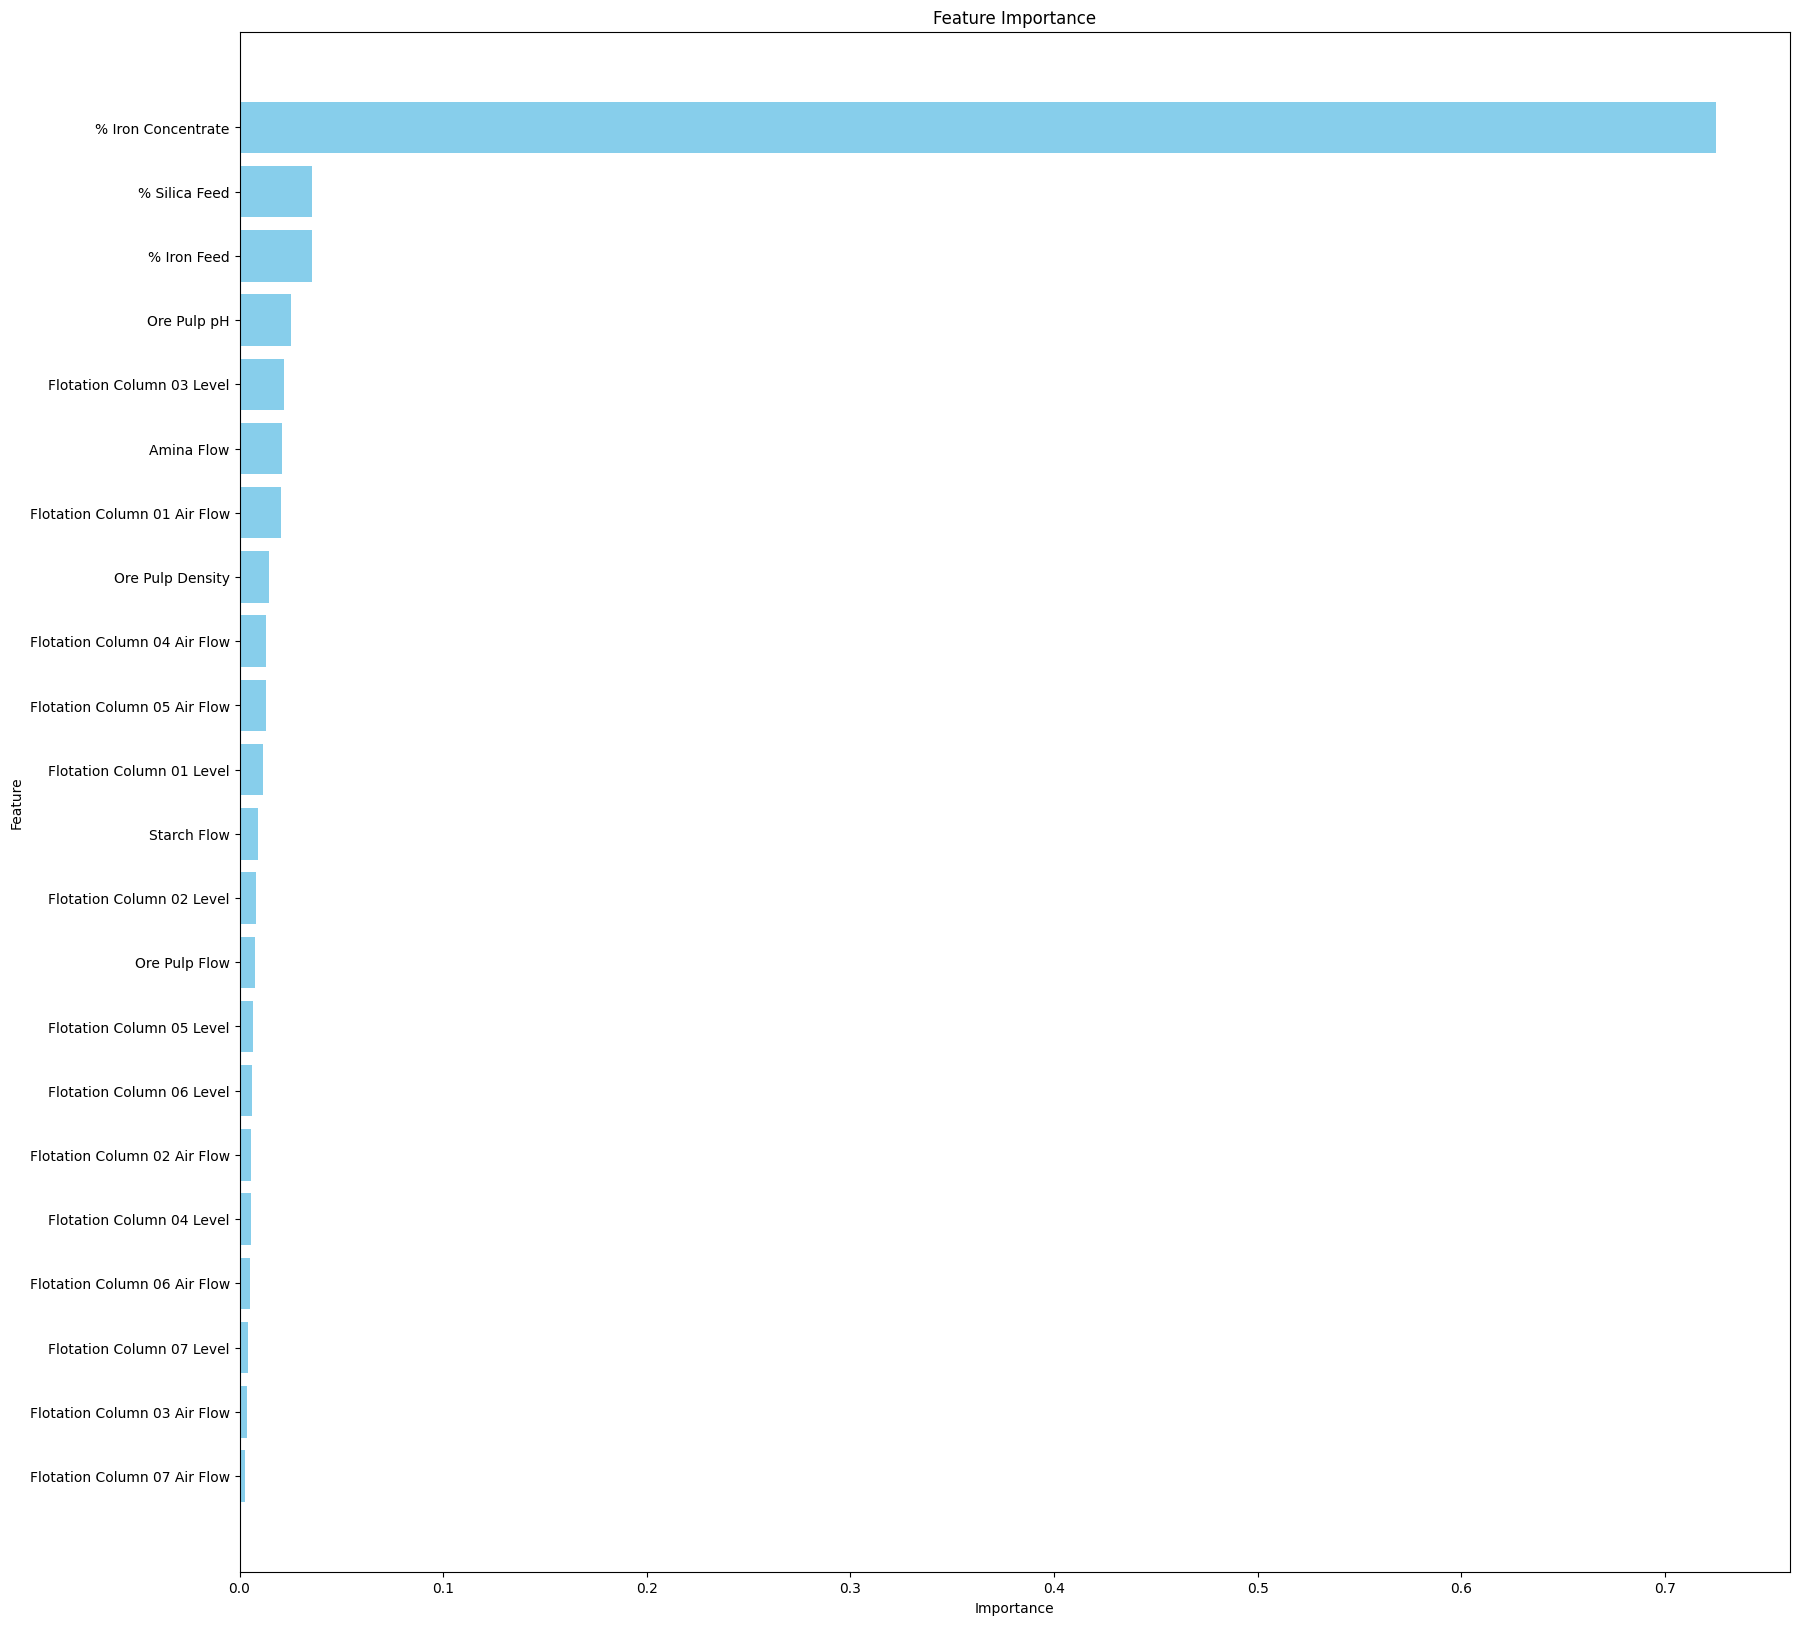

In [ ]:
# Initialiser les variables importantes
importances = randFor.feature_importances_
# Creer un tableau pour une bonne visualization
feature_importance_df = pd.DataFrame({ 'Feature': X.columns, 'Importance': importances }).sort_values(by='Importance', ascending=False)
# Afficher les variables importantes
print(feature_importance_df)
# vISUALIZER les variables importantEs
plt.figure(figsize=(20, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance des attributs')
plt.gca().invert_yaxis() # To display the most important features at the top plt.show()

Ce plot montre l'importance de chaque variable dans la prediction et ca se confirm avec le tableau de correlation obtenu précédemment.

Merci d'être arriver jusqu'ici!

 C'est un tutorial introductif qui peut etre enrichis avec plus des mêthodes et techniques. En cas des questions ou besoin d'une collaboration n'hesite de me contacter via bertheny2@gmail.com.